In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install feature_engine
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [11]:
import plotly.express as px

# Data Wrangling

In [12]:
master_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
data = master_data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
data.shape

(8693, 14)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [15]:
data[["Cabin_deck","Cabin_no.","Cabin_side"]]=data["Cabin"].str.split("/",expand=True)
data.drop(columns=["Cabin"],inplace=True)

data[["firstname","last_name"]]=data["Name"].str.split(" ",expand=True)
data.drop(columns=["Name"],inplace=True)

data[["Passenger_group","Passennger_no._in_group"]]=data["PassengerId"].str.split("_",expand=True)
#dropinng passengerId as we have seperated the information in two column we dont need it..
data.drop(columns=["PassengerId"],inplace=True)

data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,Passenger_group,Passennger_no._in_group
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham,Ofracculy,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna,Vines,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark,Susent,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam,Susent,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy,Santantines,0004,01


In [16]:
data.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                        179
VIP                        203
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Transported                  0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
Passenger_group              0
Passennger_no._in_group      0
dtype: int64

In [17]:
px.imshow(data.isnull().T,color_continuous_scale=px.colors.sequential.Blackbody)

<AxesSubplot:>

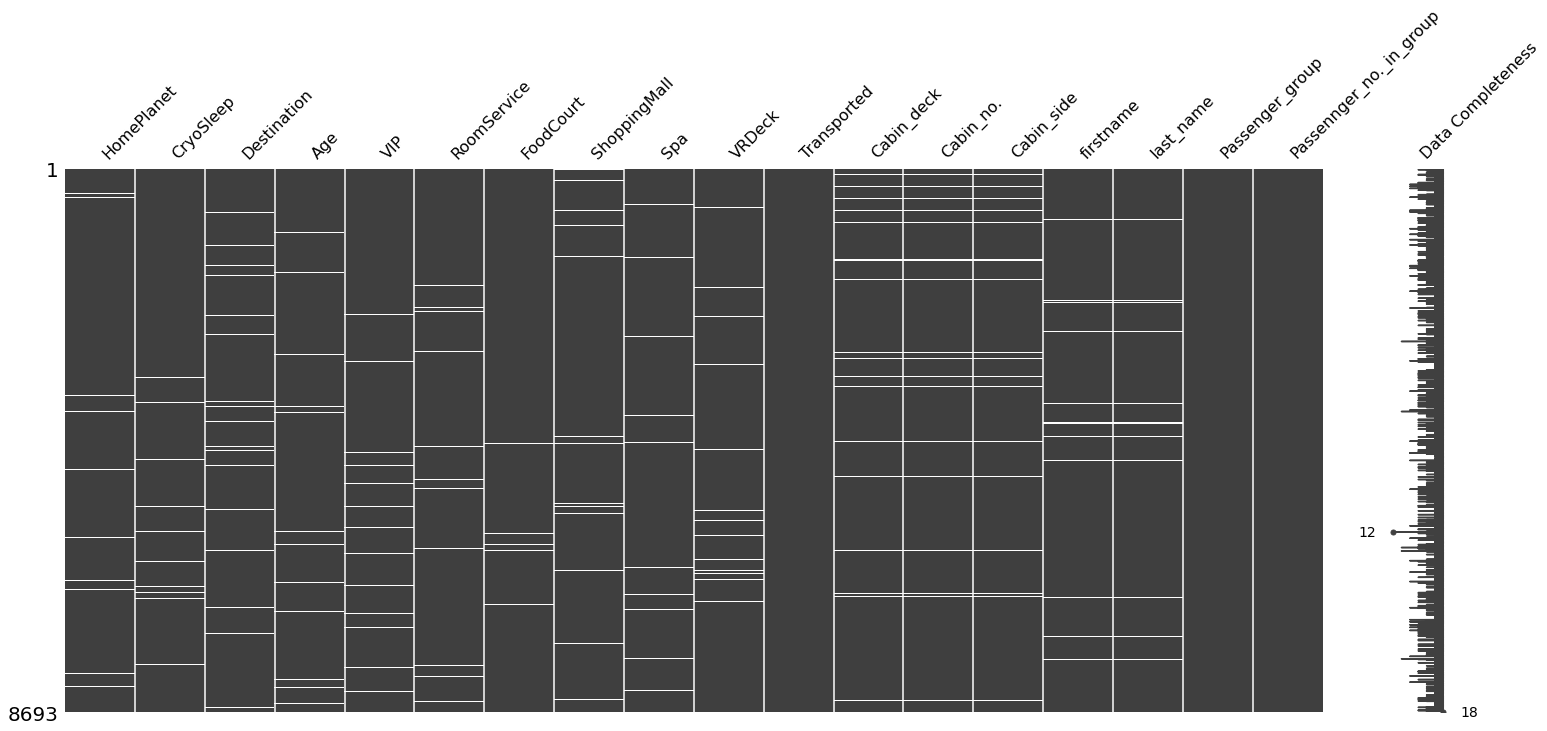

In [18]:
import missingno as msno

msno.matrix(data,labels = True)

In [19]:
temp=data.copy()

In [20]:
temp=temp=temp.dropna()

In [21]:
print(data.shape)
print(temp.shape)

(8693, 18)
(6606, 18)


In [22]:
print(data['HomePlanet'].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [23]:
print(data['CryoSleep'].value_counts())

False    5439
True     3037
Name: CryoSleep, dtype: int64


In [24]:
print(data['Cabin_no.'].value_counts())

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_no., Length: 1817, dtype: int64


In [25]:
data.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                        179
VIP                        203
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Transported                  0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
Passenger_group              0
Passennger_no._in_group      0
dtype: int64

In [26]:
from feature_engine.imputation import CategoricalImputer

mode_imputer= CategoricalImputer(imputation_method="frequent",
variables=[
    'HomePlanet',
     'CryoSleep',
     'Destination',
     'VIP',
     'Cabin_deck',
     #'Cabin_no.',
     'Cabin_side',
     'firstname',
    'last_name'])

mode_imputer.fit(data)
print(mode_imputer.imputer_dict_)
data=mode_imputer.transform(data)

{'HomePlanet': 'Earth', 'CryoSleep': False, 'Destination': 'TRAPPIST-1e', 'VIP': False, 'Cabin_deck': 'F', 'Cabin_side': 'S', 'firstname': 'Idace', 'last_name': 'Casonston'}


In [27]:
data['Cabin_no.'] = pd.to_numeric(data['Cabin_no.'])

In [28]:
data.isna().sum()
#data.info()

HomePlanet                   0
CryoSleep                    0
Destination                  0
Age                        179
VIP                          0
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Transported                  0
Cabin_deck                   0
Cabin_no.                  199
Cabin_side                   0
firstname                    0
last_name                    0
Passenger_group              0
Passennger_no._in_group      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

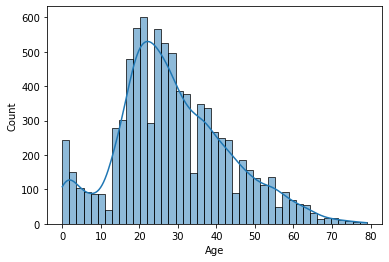

In [29]:
import seaborn as sns

sns.histplot(data.Age, kde=True)

In [30]:
skewValue = data.skew(axis=0)
skewValue

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



CryoSleep                   0.632024
Age                         0.419097
VIP                         6.381293
RoomService                 6.333014
FoodCourt                   7.102228
ShoppingMall               12.627562
Spa                         7.636020
VRDeck                      7.819732
Transported                -0.014497
Cabin_no.                   0.718360
Passenger_group             0.002020
Passennger_no._in_group     2.746617
dtype: float64

In [31]:
data.dtypes

HomePlanet                  object
CryoSleep                     bool
Destination                 object
Age                        float64
VIP                           bool
RoomService                float64
FoodCourt                  float64
ShoppingMall               float64
Spa                        float64
VRDeck                     float64
Transported                   bool
Cabin_deck                  object
Cabin_no.                  float64
Cabin_side                  object
firstname                   object
last_name                   object
Passenger_group             object
Passennger_no._in_group     object
dtype: object

In [32]:
from feature_engine.imputation import MeanMedianImputer

median_imputer = MeanMedianImputer(imputation_method="median",variables=["Age",
                                                                        "RoomService",
                                                                        "FoodCourt",
                                                                        "ShoppingMall",
                                                                        "Spa",
                                                                        "VRDeck",
                                                                        "Cabin_no."])

median_imputer.fit(data)
print(median_imputer.imputer_dict_)
data = median_imputer.transform(data)

{'Age': 27.0, 'RoomService': 0.0, 'FoodCourt': 0.0, 'ShoppingMall': 0.0, 'Spa': 0.0, 'VRDeck': 0.0, 'Cabin_no.': 427.0}


In [33]:
data.isna().sum()

HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Transported                0
Cabin_deck                 0
Cabin_no.                  0
Cabin_side                 0
firstname                  0
last_name                  0
Passenger_group            0
Passennger_no._in_group    0
dtype: int64

# Outliers

In [34]:
from scipy.stats import zscore

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

temp = data.select_dtypes(include=numerics)
temp=temp.apply(zscore)

temp[(abs(temp) > 3).any(axis=1)]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_no.
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.177238
11,1.130339,-0.274057,4.290638,0.701416,-0.172891,-0.153662,-1.175264
30,0.363284,-0.299796,3.524829,-0.283579,1.007031,0.026223,-1.177238
50,-0.124841,-0.327048,-0.281027,-0.280234,3.890200,-0.263003,-1.165394
54,-0.124841,0.089315,0.098117,5.358819,-0.016516,-0.260358,-1.175264
...,...,...,...,...,...,...,...
8621,0.851410,-0.333105,4.709890,-0.283579,2.606323,4.885749,-0.569274
8626,-0.194573,12.666511,-0.232772,-0.092934,-0.244860,-0.259476,-0.567300
8652,0.502749,-0.333105,3.228407,0.912128,2.277580,0.593212,-0.502161
8669,-0.194573,-0.333105,4.832720,0.059246,-0.270626,0.123219,-0.583091


# EDA

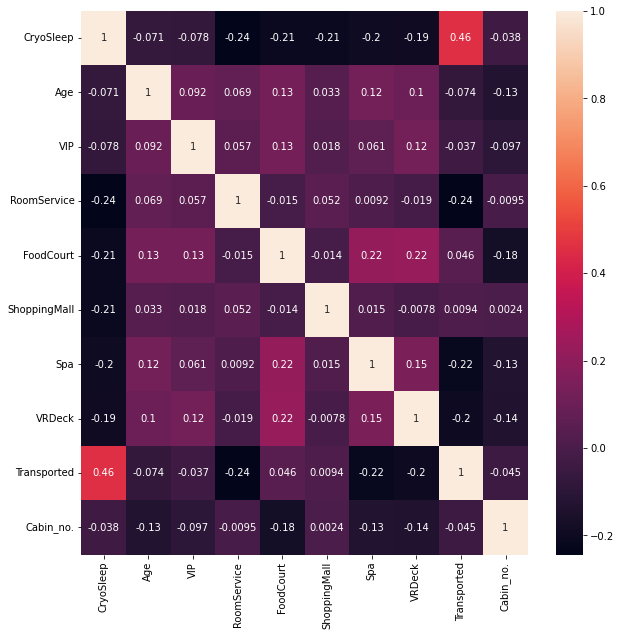

In [35]:
#import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data.corr(), annot=True)